In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/scratch/user/hjuvvana/TAMU2025Challenge/CyberWise2025/2024/Network_Traffic/Phase2/phase2_NetworkData.csv")
df.head()

/tmp/job.12973044/ipykernel_2591360/4258603982.py:1: DtypeWarning: Columns (68,69) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/scratch/user/hjuvvana/TAMU2025Challenge/CyberWise2025/2024/Network_Traffic/Phase2/phase2_NetworkData.csv")


,ts,flow_duration,Header_Length,Source IP,Destination IP,Source Port,Destination Port,Protocol Type,Protocol_name,Duration,...,Weight,DS status,Fragments,Sequence number,Protocol Version,flow_idle_time,flow_active_time,label,subLabel,subLabelCat
0,1.701728e+09,0.000000,1514,93.93.128.193,172.16.67.128,80,48884,6,TCP,127,...,1,0,0,0,0,1.701728e+09,0.000000,0,0,0
1,1.701728e+09,0.000548,1568,172.16.67.128,93.93.128.193,48884,80,6,TCP,64,...,4,0,0,0,0,5.478859e-04,0.000548,0,0,0
2,1.701728e+09,0.002528,1622,172.16.67.128,93.93.128.193,48884,80,6,TCP,64,...,9,0,0,0,0,1.980066e-03,0.002528,0,0,0
3,1.701728e+09,0.004881,1676,172.16.67.128,93.93.128.193,48884,80,6,TCP,64,...,16,0,0,0,0,2.352953e-03,0.004881,0,0,0
4,1.701728e+09,0.007555,3189,93.93.128.193,172.16.67.128,80,48884,6,TCP,127,...,25,0,0,0,0,2.674103e-03,0.007555,0,0,0


## EDA

In [3]:
df["ts"] = pd.to_datetime(df["ts"], unit='s')

In [4]:
df.columns

Index(['ts', 'flow_duration', 'Header_Length', 'Source IP', 'Destination IP',
       'Source Port', 'Destination Port', 'Protocol Type', 'Protocol_name',
       'Duration', 'Rate', 'Srate', 'Drate', 'fin_flag_number',
       'syn_flag_number', 'rst_flag_number', 'psh_flag_number',
       'ack_flag_number', 'urg_flag_number', 'ece_flag_number',
       'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count',
       'rst_count', 'max_duration', 'min_duration', 'sum_duration',
       'average_duration', 'std_duration', 'CoAP', 'HTTP', 'HTTPS', 'DNS',
       'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP',
       'IGMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size',
       'IAT', 'Number', 'MAC', 'Magnitue', 'Radius', 'Covariance', 'Variance',
       'Weight', 'DS status', 'Fragments', 'Sequence number',
       'Protocol Version', 'flow_idle_time', 'flow_active_time', 'label',
       'subLabel', 'subLabelCat'],
      dtype='object')

In [5]:
print(df['label'].value_counts())
print(df['Protocol_name'].value_counts())

label
0    9535819
1       1004
Name: count, dtype: int64
Protocol_name
TCP     8899014
UDP      561004
ARP       74995
ICMP       1810
Name: count, dtype: int64


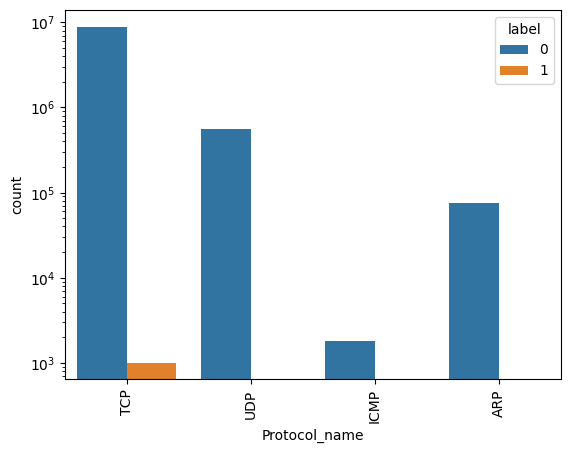

In [6]:
sns.countplot(x='Protocol_name', hue='label', data=df)
plt.yscale('log')  # Log scale to handle imbalance
plt.xticks(rotation=90)
plt.show()

#Explanation about TCP Vs non-TCP; 
#You could also analyze how flow duration differs between TCP and other protocols. For instance, TCP connections often have longer, more stable durations compared to UDP or ICMP connections, which might be more transient or bursty in nature.

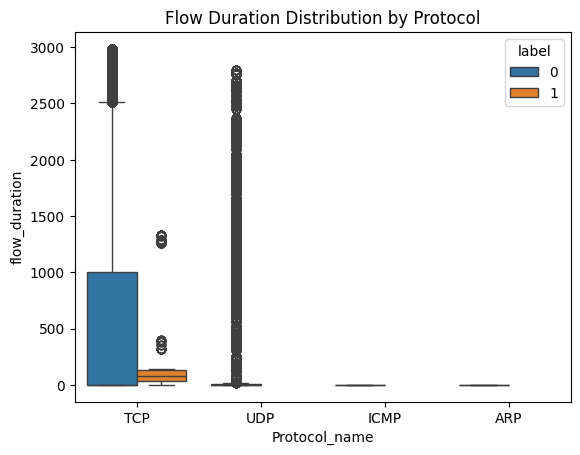

In [7]:
import seaborn as sns

# Plot flow duration by protocol
sns.boxplot(x='Protocol_name', y='flow_duration', data=df, hue = 'label')
plt.title('Flow Duration Distribution by Protocol')
plt.show()


       flow_duration        Rate
label                           
0         515.522054  440.696861
1         299.333138   35.413574


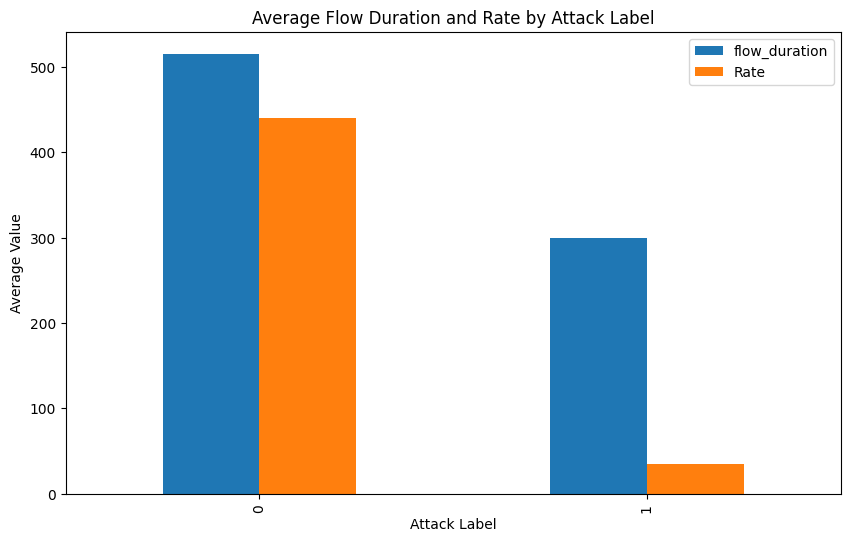

In [8]:
#Groupby and Aggregation Analysis
#Analyze average metrics for different attack labels to further diagnose underlying factors.
# Grouping data by 'label' and calculating average flow_duration and Rate
grouped = df.groupby('label')[['flow_duration', 'Rate']].mean()
print(grouped)

# Visualize the grouped results
grouped.plot(kind='bar', figsize=(10,6))
plt.title('Average Flow Duration and Rate by Attack Label')
plt.xlabel('Attack Label')
plt.ylabel('Average Value')
plt.show()
#Differences in the averages between labels can point to distinctive patterns that separate benign from malicious traffic. Such patterns may serve as diagnostic features in the predictive modeling stage.

## Analyze Attack Timing Patterns

In [9]:
#Time-Series Analysis:
#Use moving averages and trend analysis to detect sudden changes.
#Implement change-point detection algorithms to pinpoint when patterns shift, which might coincide with attack start times.
df['ts'] = pd.to_datetime(df['ts'], errors='coerce')

# Optionally, drop rows where ts could not be converted
df = df.dropna(subset=['ts'])

# Convert specific columns to numeric if necessary
columns_to_convert = ['flow_duration', 'Header_Length', 'Rate', 'Srate', 'Drate']  # add others as needed
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Set 'ts' as the index
df = df.set_index('ts')

# Select only numeric columns for resampling
numeric_data = df.select_dtypes(include=['number'])

# Resample the numeric data to 1-minute intervals and compute the mean
df_time = numeric_data.resample('1T').mean()

df_time.head()


/tmp/job.12973044/ipykernel_2591360/3712711937.py:21: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_time = numeric_data.resample('1T').mean()


,flow_duration,Header_Length,Source Port,Destination Port,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,...,Covariance,Variance,Weight,DS status,Fragments,Sequence number,Protocol Version,flow_idle_time,flow_active_time,label
ts,,,,,,,,,,,,,,,,,,,,,
2023-12-01 22:16:00,0.427230,1829.108153,22300.846090,15015.207987,5.782030,61.940932,870.457578,870.457578,0.0,0.153078,...,7289.812613,0.811148,141.318636,0.0,0.0,0.0,0.0,4.529701e+07,0.427230,0.0
2023-12-01 22:17:00,0.442419,1473.768227,27259.724482,17121.882579,6.410591,62.716807,690.948853,690.948853,0.0,0.184190,...,33.470152,0.804298,141.262471,0.0,0.0,0.0,0.0,5.223236e+07,0.442419,0.0
2023-12-01 22:18:00,0.599321,8064.151941,28482.825549,16438.557681,7.281373,64.722003,779.931380,779.931380,0.0,0.137310,...,29739.151432,0.808666,141.760833,0.0,0.0,0.0,0.0,3.925731e+07,0.599321,0.0
2023-12-01 22:19:00,8.218335,6927.432339,24152.426606,22781.619266,5.944954,63.555046,447.465709,447.465709,0.0,0.137615,...,34.257235,0.829702,141.274656,0.0,0.0,0.0,0.0,3.024400e+07,8.218335,0.0
2023-12-01 22:20:00,24.018707,19727.333976,27579.128808,19187.593521,8.462013,60.853837,532.011108,532.011108,0.0,0.092557,...,1483.439629,0.775935,141.757809,0.0,0.0,0.0,0.0,4.133921e+07,24.018707,0.0


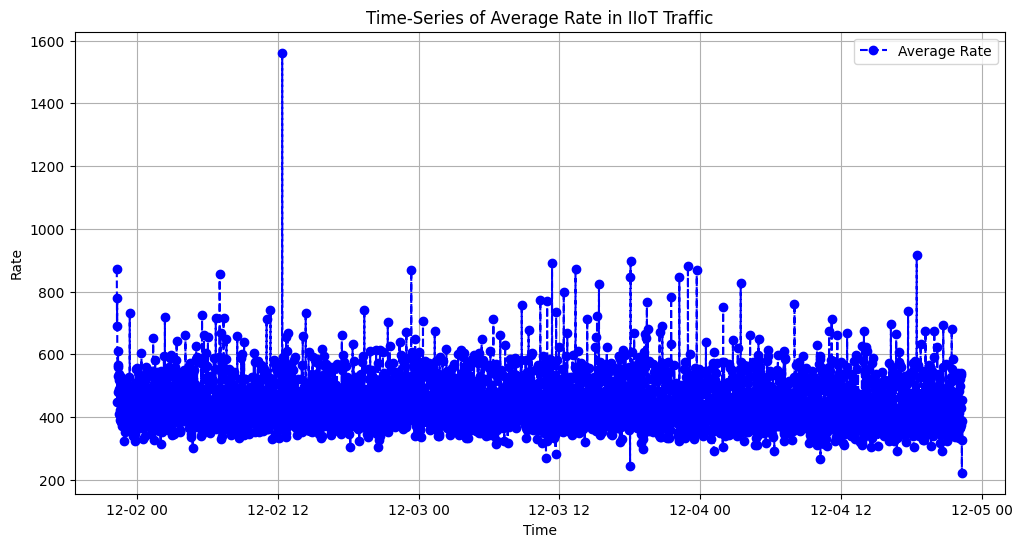

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df_time.index, df_time['Rate'], label='Average Rate', color='blue', linestyle='--', marker='o')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Time-Series of Average Rate in IIoT Traffic')
plt.legend()
plt.grid(True)  # Adds grid for better readability
plt.show()

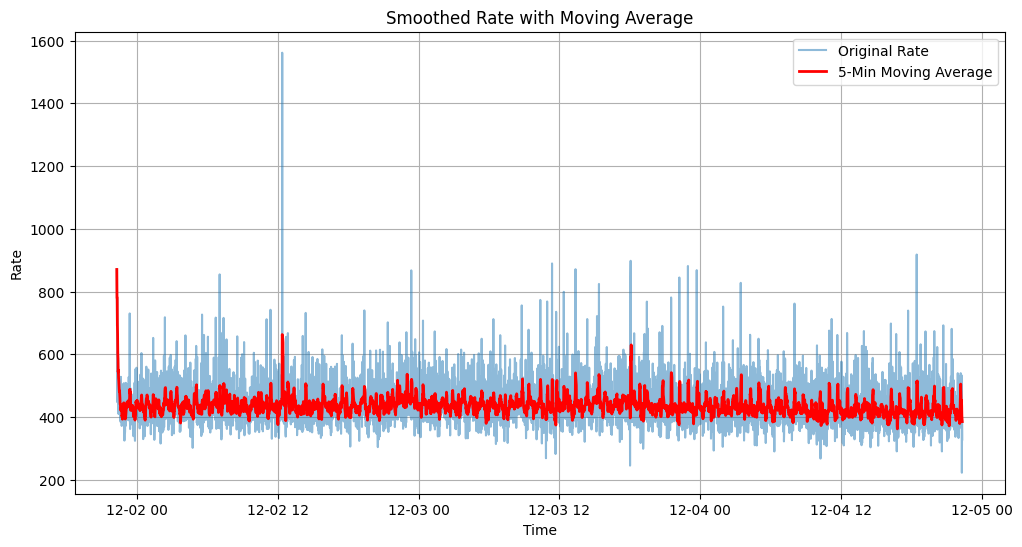

In [11]:
# Moving Average to Smooth the Time-Series
df_time['Rate_MA'] = df_time['Rate'].rolling(window=5, min_periods=1).mean()  # 5-minute moving average

plt.figure(figsize=(12, 6))
plt.plot(df_time.index, df_time['Rate'], label='Original Rate', alpha=0.5)
plt.plot(df_time.index, df_time['Rate_MA'], label='5-Min Moving Average', color='red', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Smoothed Rate with Moving Average')
plt.legend()
plt.grid(True)
plt.show()

Detected Change Points (Timestamps):
2023-12-01 22:21:00
2023-12-01 22:31:00
2023-12-03 14:11:00
2023-12-03 19:41:00
2023-12-04 06:01:00


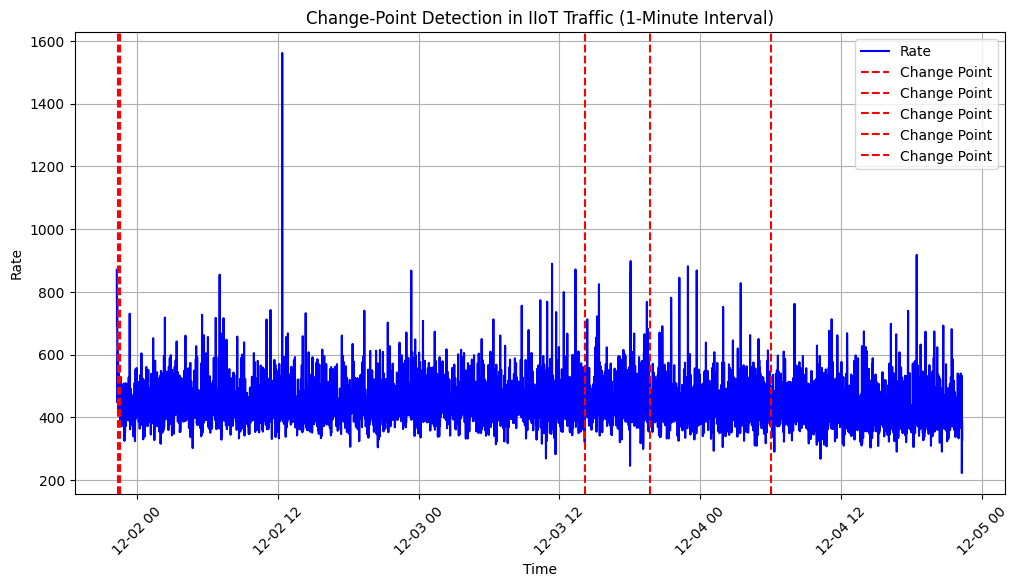

<Figure size 640x480 with 0 Axes>

In [12]:
import ruptures as rpt  # Correct import
import matplotlib.pyplot as plt

# Drop NaN values from 'Rate' column
df_time = df_time.dropna(subset=['Rate'])  
signal = df_time['Rate'].values  
timestamps = df_time.index  # Correctly map timestamps

# Apply Binary Segmentation (Binseg) algorithm
algo = rpt.Binseg(model="l2").fit(signal)
change_points = algo.predict(n_bkps=5)  # Detect 5 change points

# Convert index positions to actual timestamps
change_point_times = timestamps[change_points[:-1]]  # Map detected change points

# Print detected timestamps
print("Detected Change Points (Timestamps):")
for time in change_point_times:
    print(time)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df_time.index, signal, label='Rate', color='blue')

# Highlight change points with red dashed lines and text annotations
for cp in change_point_times:
    plt.axvline(cp, color='red', linestyle='--', label='Change Point')
    #plt.text(cp, signal.mean(), str(cp), rotation=45, color='green', fontsize=10)

plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Change-Point Detection in IIoT Traffic (1-Minute Interval)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
plt.savefig('Pic1.png')

Detected Change Points (Timestamps):
2023-12-01 22:21:00
2023-12-01 22:31:00
2023-12-03 14:11:00
2023-12-03 19:41:00
2023-12-04 06:01:00


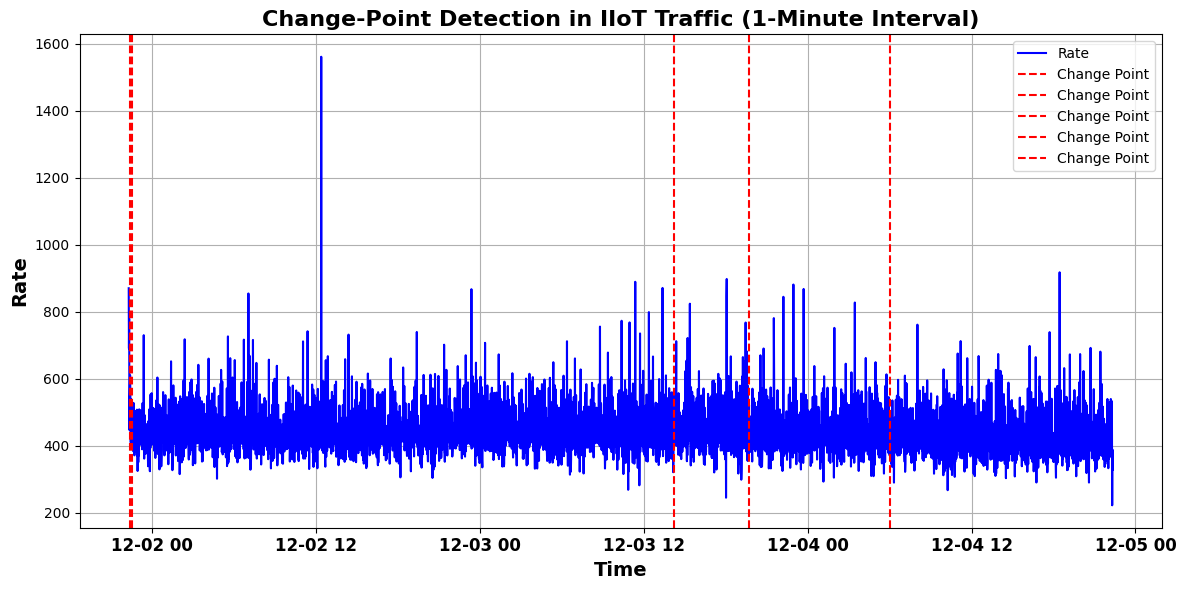

<Figure size 640x480 with 0 Axes>

In [13]:
import ruptures as rpt
import matplotlib.pyplot as plt

# Drop NaN values from 'Rate' column
df_time = df_time.dropna(subset=['Rate'])  
signal = df_time['Rate'].values  
timestamps = df_time.index  # Correctly map timestamps

# Apply Binary Segmentation (Binseg) algorithm
algo = rpt.Binseg(model="l2").fit(signal)
change_points = algo.predict(n_bkps=5)  # Detect 5 change points

# Convert index positions to actual timestamps
change_point_times = timestamps[change_points[:-1]]  # Map detected change points

# Print detected timestamps
print("Detected Change Points (Timestamps):")
for time in change_point_times:
    print(time)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df_time.index, signal, label='Rate', color='blue')

# Highlight change points with red dashed lines and text annotations
for cp in change_point_times:
    plt.axvline(cp, color='red', linestyle='--', label='Change Point')

# Set the labels, title, and formatting
plt.xlabel('Time', fontsize=14, fontweight='bold')  # Bold X-axis label
plt.ylabel('Rate', fontsize=14, fontweight='bold')  # Bold Y-axis label
plt.title('Change-Point Detection in IIoT Traffic (1-Minute Interval)', fontsize=16, fontweight='bold')  # Bold Title
plt.legend()
plt.grid(True)
plt.xticks(rotation=0, fontsize=12, fontweight='bold')
plt.tight_layout()  # Ensure the plot fits into the figure area
plt.show()

# Save the figure
plt.savefig('Pic1.png')


/tmp/job.12973044/ipykernel_2591360/74777929.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = numeric_data.resample('H').mean()


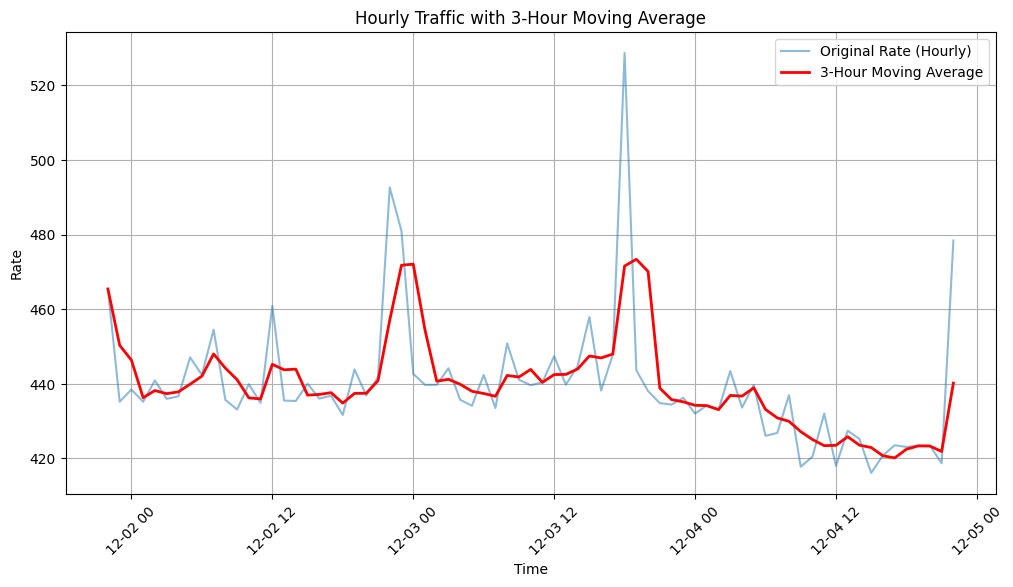

In [14]:
# Resample the numeric data to 1-hour intervals and compute the mean
df_hourly = numeric_data.resample('H').mean()
df_hourly['Rate_MA'] = df_hourly['Rate'].rolling(window=3, min_periods=1).mean()  # 3-hour moving average

plt.figure(figsize=(12, 6))
plt.plot(df_hourly.index, df_hourly['Rate'], label='Original Rate (Hourly)', alpha=0.5)
plt.plot(df_hourly.index, df_hourly['Rate_MA'], label='3-Hour Moving Average', color='red', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Hourly Traffic with 3-Hour Moving Average')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Detected Change Points (Timestamps):
2023-12-02 18:00:00
2023-12-03 14:00:00
2023-12-03 19:00:00
2023-12-04 05:00:00
2023-12-04 20:00:00


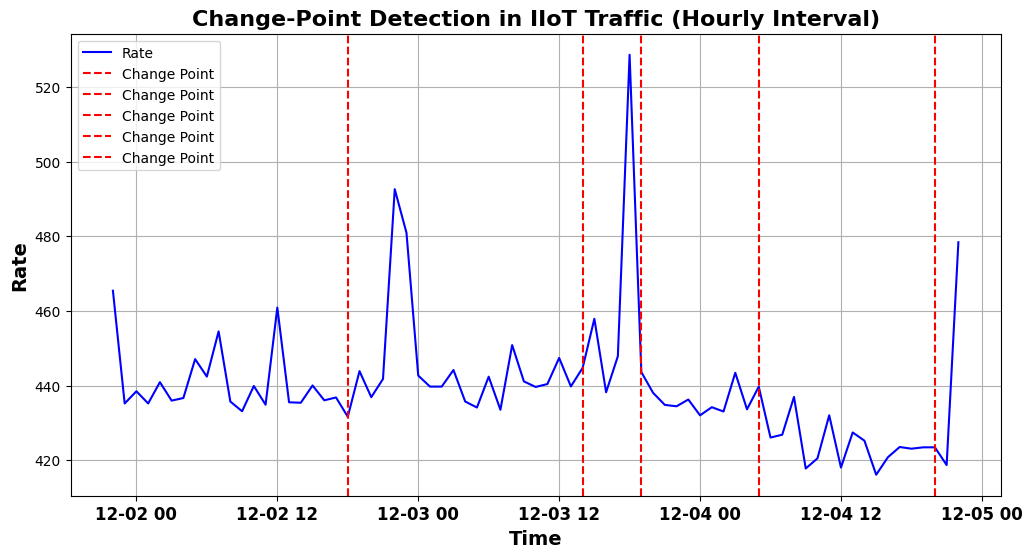

<Figure size 640x480 with 0 Axes>

In [15]:
import ruptures as rpt  # Correct import

# Use change-point detection on the 'Rate' column
signal = df_hourly['Rate'].dropna().values  # Ensure no NaN values
timestamps = df_hourly.index

# Apply Binary Segmentation (Binseg) algorithm
algo = rpt.Binseg(model="l2").fit(signal)
change_points = algo.predict(n_bkps=5)  # Detect 5 change points

# Convert index positions to actual timestamps
change_point_times = timestamps[change_points[:-1]]  # Map detected change points

# Print detected timestamps
print("Detected Change Points (Timestamps):")
for time in change_point_times:
    print(time)
    
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df_hourly.index, signal, label='Rate', color='blue')
for cp in change_points[:-1]:  # Exclude last index (end of series)
    plt.axvline(df_hourly.index[cp], color='red', linestyle='--', label='Change Point')
plt.xlabel('Time', fontsize=14, fontweight='bold')  # Bold X-axis label
plt.ylabel('Rate', fontsize=14, fontweight='bold')  # Bold Y-axis label
plt.title('Change-Point Detection in IIoT Traffic (Hourly Interval)', fontsize=16, fontweight='bold')
plt.legend()
plt.grid(True)
plt.xticks(rotation=0, fontsize=12, fontweight='bold') 
plt.show()
plt.savefig('Pic2.png')

## Flag Analysis

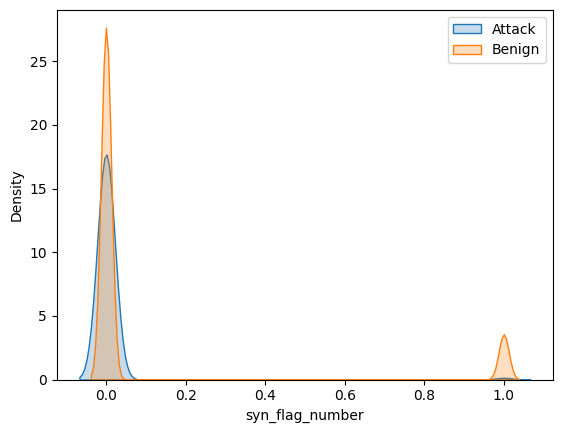

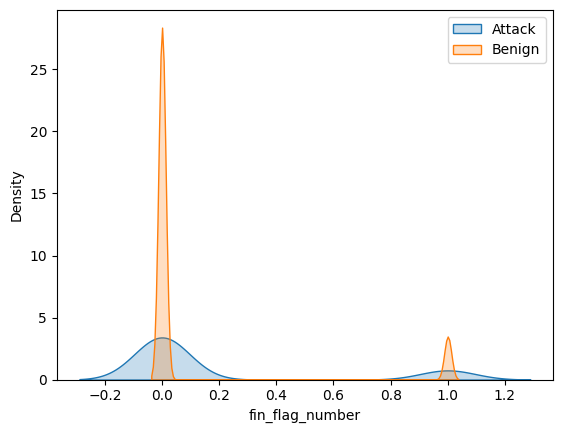

/tmp/job.12973044/ipykernel_2591360/2529059594.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(attack_data[flag], label='Attack', fill=True)


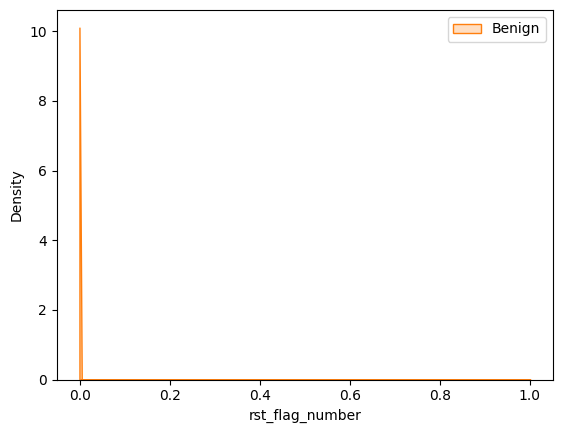

In [16]:
#Flag Analysis: Identify abnormal flag behaviors in attacks
attack_data = df[df['label'] != 0]
benign_data = df[df['label'] == 0]

for flag in ['syn_flag_number', 'fin_flag_number', 'rst_flag_number']:
    sns.kdeplot(attack_data[flag], label='Attack', fill=True)
    sns.kdeplot(benign_data[flag], label='Benign', fill=True)
    plt.legend()
    plt.show()

## Cyber Attack Pattern Identification

### Detect Port Scanning:

In [17]:

df.groupby('Source IP')['Destination Port'].nunique().sort_values(ascending=False).head(10)

Source IP
172.16.66.128     14118
44.230.212.240      175
100.21.15.118       158
132.246.11.237      130
172.16.65.128        58
172.16.63.128        34
8.8.8.8              26
8.8.4.4              16
192.168.219.2        16
54.69.37.156          8
Name: Destination Port, dtype: int64

### SYN Flooding

In [18]:
print(df[['syn_flag_number', 'ack_flag_number']].value_counts())

syn_flag_number  ack_flag_number
0                1                  7810549
                 0                   638888
1                0                   567264
                 1                   520122
Name: count, dtype: int64


In [19]:
# Define SYN flood threshold (adjust based on dataset size)
SYN_THRESHOLD = 500  # Adjust as needed

# Filter connections where SYN = 1 and ACK = 0
syn_half_open = df[(df['syn_flag_number'] == 1) & (df['ack_flag_number'] == 0)]

# Count occurrences per Source IP
syn_flood_candidates = syn_half_open.groupby('Source IP').size().reset_index(name='syn_count')

# Filter IPs with excessive SYNs
syn_flood_sources = syn_flood_candidates[syn_flood_candidates['syn_count'] > SYN_THRESHOLD]

# Display results
print("🚨 Potential SYN Flood Attack Sources 🚨")
print(syn_flood_sources if not syn_flood_sources.empty else "No SYN flood detected.")

🚨 Potential SYN Flood Attack Sources 🚨
       Source IP  syn_count
0  172.16.63.128      47634
1  172.16.64.128     518856
4    192.168.4.3        700


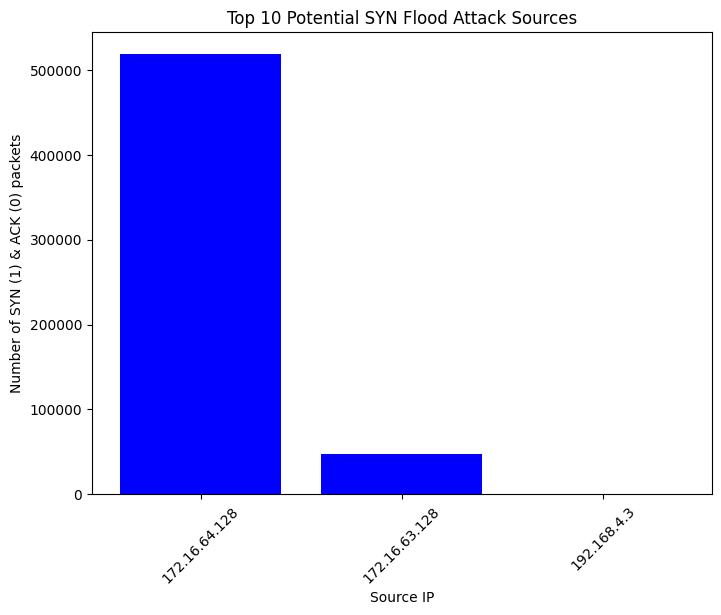

In [20]:
import matplotlib.pyplot as plt

# Sort and take top 10
top_syn_attackers = syn_flood_sources.sort_values(by='syn_count', ascending=False).head(10)

plt.figure(figsize=(8, 6))
plt.bar(top_syn_attackers['Source IP'], top_syn_attackers['syn_count'], color='blue')
plt.xticks(rotation=45)
plt.xlabel("Source IP")
plt.ylabel("Number of SYN (1) & ACK (0) packets")
plt.title("Top 10 Potential SYN Flood Attack Sources")
plt.show()


### DDoS: High packet rates (Rate, Srate, Drate) from a single source

In [21]:
ddos_resampled = df[['Rate', 'Srate', 'Drate']].resample('30S').mean()

# Resample 'Source IP' to capture the first occurrence in each 30-second window
df['timestamp'] = df.index  # Save the original timestamp
source_ip_mapping = df[['timestamp', 'Source IP']].set_index('timestamp').resample('30S').first()
ddos_resampled['Source IP'] = source_ip_mapping['Source IP']

# Group by 'Source IP' and calculate the mean packet rates for each IP
ddos_by_ip = ddos_resampled.groupby('Source IP').agg({
    'Rate': 'mean',
    'Srate': 'mean',
    'Drate': 'mean'
}).reset_index()

/tmp/job.12973044/ipykernel_2591360/3920438755.py:1: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  ddos_resampled = df[['Rate', 'Srate', 'Drate']].resample('30S').mean()
/tmp/job.12973044/ipykernel_2591360/3920438755.py:5: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  source_ip_mapping = df[['timestamp', 'Source IP']].set_index('timestamp').resample('30S').first()


In [22]:
# Define a threshold for packet rate (Rate, Srate, Drate)
PACKET_RATE_THRESHOLD = 500  

# Flag suspicious DDoS activity
ddos_by_ip['Potential DDoS'] = (ddos_by_ip['Rate'] > PACKET_RATE_THRESHOLD) | \
                                (ddos_by_ip['Srate'] > PACKET_RATE_THRESHOLD) | \
                                (ddos_by_ip['Drate'] > PACKET_RATE_THRESHOLD)

# Filter potential DDoS sources
potential_ddos_sources = ddos_by_ip[ddos_by_ip['Potential DDoS'] == True]
print("🚨 Potential DDoS Attack Sources 🚨")
print(potential_ddos_sources)

🚨 Potential DDoS Attack Sources 🚨
        Source IP        Rate       Srate  Drate  Potential DDoS
6   172.16.67.128  512.780862  512.780862    0.0            True
12  93.93.128.193  533.075873  533.075873    0.0            True


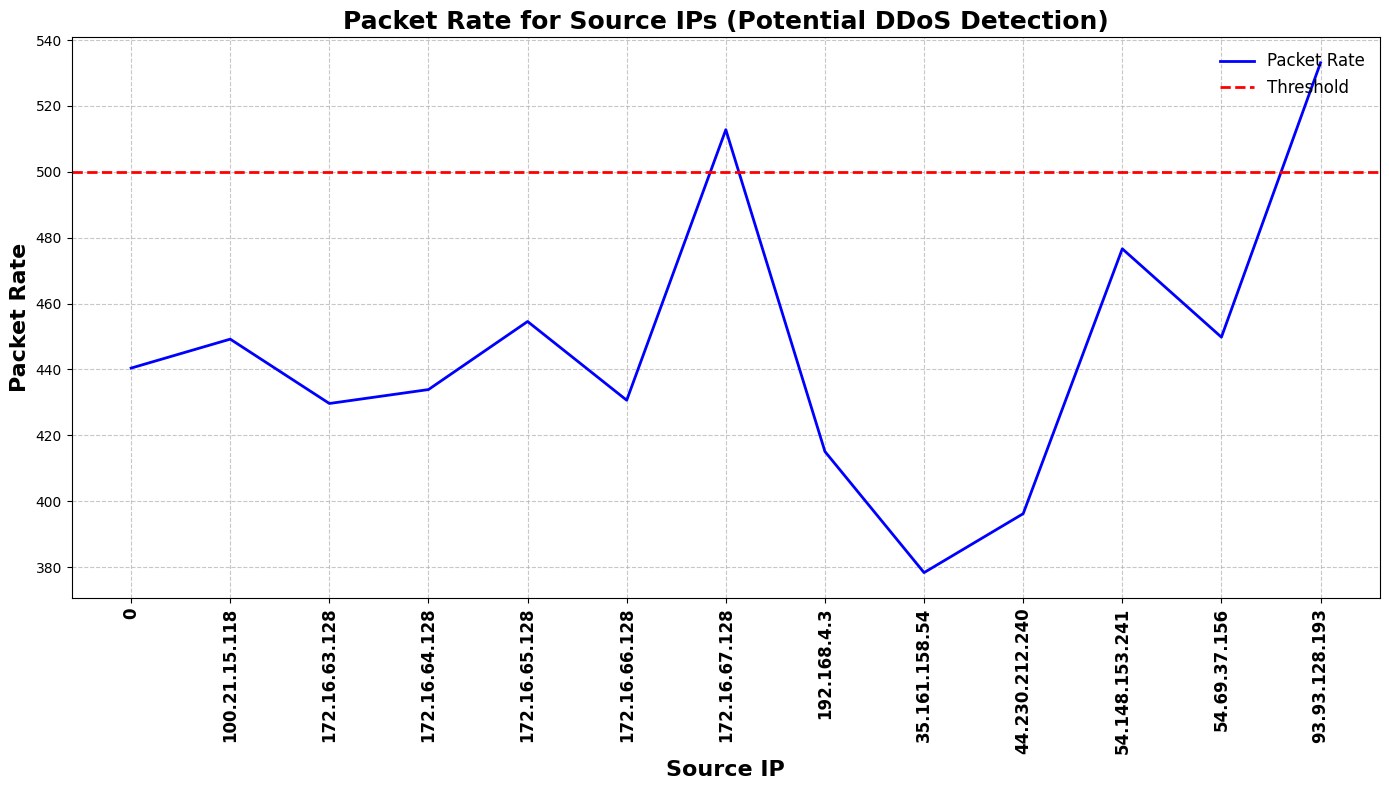

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize packet rates for Source IPs that have high activity
plt.figure(figsize=(14, 8))
sns.lineplot(data=ddos_by_ip, x='Source IP', y='Rate', label='Packet Rate', color='b', linewidth=2)

# Add threshold line
plt.axhline(PACKET_RATE_THRESHOLD, color='r', linestyle='--', label='Threshold', linewidth=2)

# Set the title, labels, and formatting
plt.xlabel('Source IP', fontsize=16, fontweight='bold')  # Bold X-axis label
plt.ylabel('Packet Rate', fontsize=16, fontweight='bold')  # Bold Y-axis label
plt.title('Packet Rate for Source IPs (Potential DDoS Detection)', fontsize=18, fontweight='bold')  # Bold Title

# Rotate X-axis labels for better readability
plt.xticks(rotation=90, fontsize=12, fontweight='bold')  # Bold X-axis ticks

# Add gridlines for better visibility
plt.grid(True, linestyle='--', alpha=0.7)

# Display the legend
plt.legend(fontsize=12, loc='upper right', frameon=False)

# Show the plot
plt.tight_layout()  # Ensure the plot fits well
plt.show()


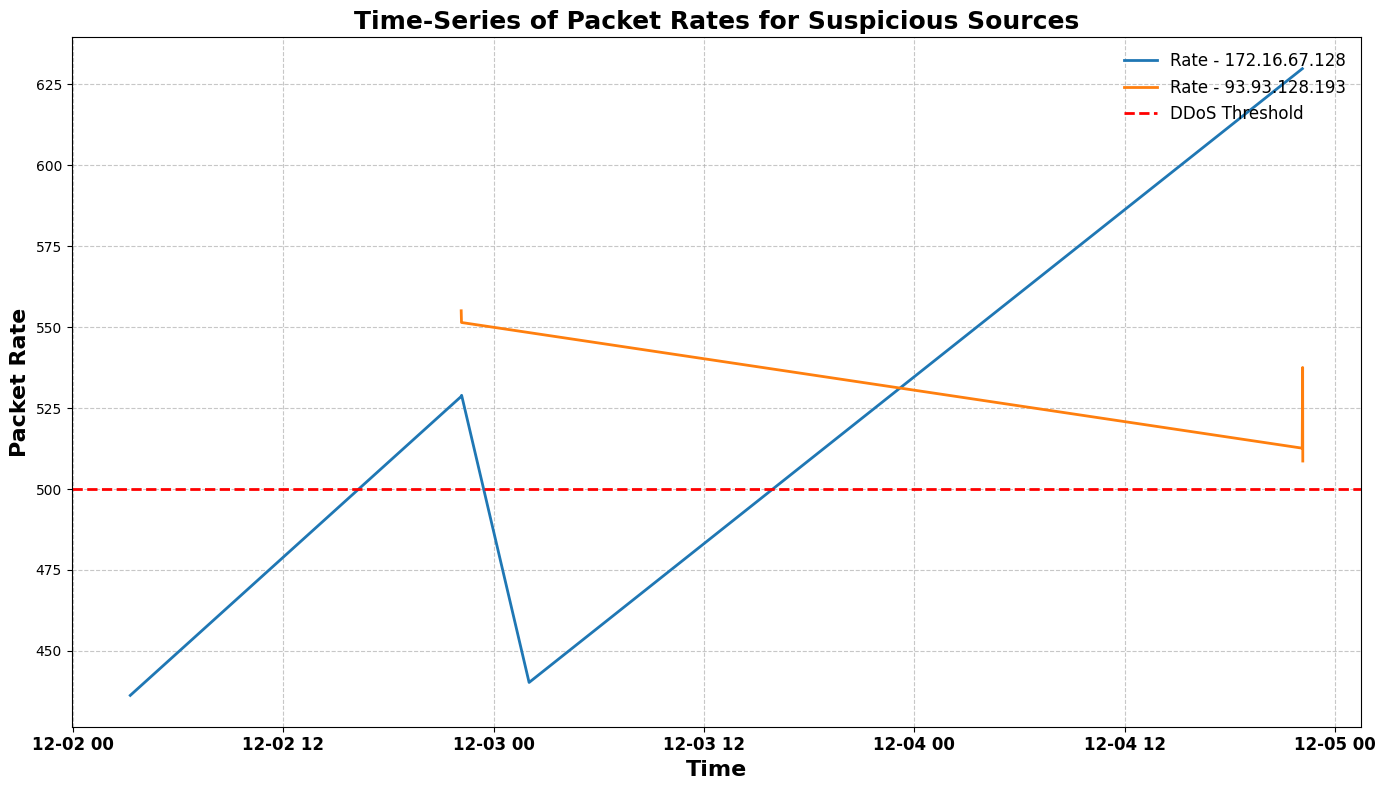

In [24]:
# Filter time-series data for suspicious IPs
suspicious_ips = ['172.16.67.128', '93.93.128.193']
import matplotlib.pyplot as plt

# Filter time-series data for suspicious IPs
suspicious_traffic = ddos_resampled[ddos_resampled['Source IP'].isin(suspicious_ips)]

# Plot time-series trends for the suspicious IPs
plt.figure(figsize=(14, 8))

# Loop through suspicious IPs and plot their packet rates
for ip in suspicious_ips:
    subset = suspicious_traffic[suspicious_traffic['Source IP'] == ip]
    plt.plot(subset.index, subset['Rate'], label=f'Rate - {ip}', linewidth=2)

# Add threshold line for DDoS detection
plt.axhline(PACKET_RATE_THRESHOLD, color='r', linestyle='--', label='DDoS Threshold', linewidth=2)

# Set the title, labels, and formatting
plt.xlabel('Time', fontsize=16, fontweight='bold')  # Bold X-axis label
plt.ylabel('Packet Rate', fontsize=16, fontweight='bold')  # Bold Y-axis label
plt.title('Time-Series of Packet Rates for Suspicious Sources', fontsize=18, fontweight='bold')  # Bold Title

# Rotate X-axis labels for better readability
plt.xticks(rotation=0, fontsize=12, fontweight='bold')  # Bold X-axis ticks

# Add gridlines for better visibility
plt.grid(True, linestyle='--', alpha=0.7)

# Display the legend with larger font and no frame
plt.legend(fontsize=12, loc='upper right', frameon=False)

# Show the plot
plt.tight_layout()  # Ensure the plot fits well
plt.show()



### Identify Top Attackers (IPs)

In [25]:
#Identify Top Attackers (IPs):
df[df['label'] != 0]['Source IP'].value_counts().head(10)

Source IP
172.16.65.128    538
172.16.63.128    466
Name: count, dtype: int64

### Find Most Targeted Ports

/tmp/job.12973044/ipykernel_2591360/3713800748.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ports.index, y=top_ports.values, palette="viridis")


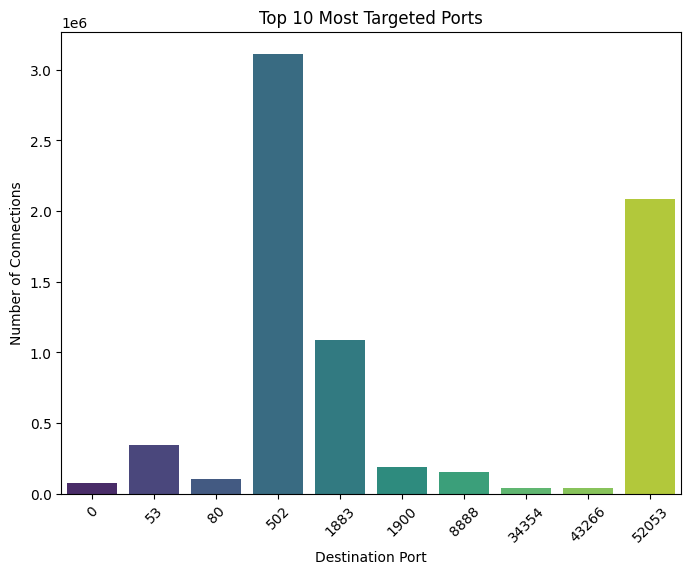

   Destination Port  Connection Count
0               502           3113448
1             52053           2083897
2              1883           1090184
3                53            342502
4              1900            190256
5              8888            157052
6                80            102970
7                 0             76805
8             43266             40984
9             34354             40858


In [26]:

import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each Destination Port
port_counts = df['Destination Port'].value_counts()

# Select the top 10 most targeted ports
top_ports = port_counts.head(10)

# Plot the results
plt.figure(figsize=(8,6))
sns.barplot(x=top_ports.index, y=top_ports.values, palette="viridis")
plt.xlabel("Destination Port")
plt.ylabel("Number of Connections")
plt.title("Top 10 Most Targeted Ports")
plt.xticks(rotation=45)
plt.show()

# Display the results as a table
top_ports_df = top_ports.reset_index()
top_ports_df.columns = ['Destination Port', 'Connection Count']
print(top_ports_df)


## Machine Learning-Based Anomaly Detection

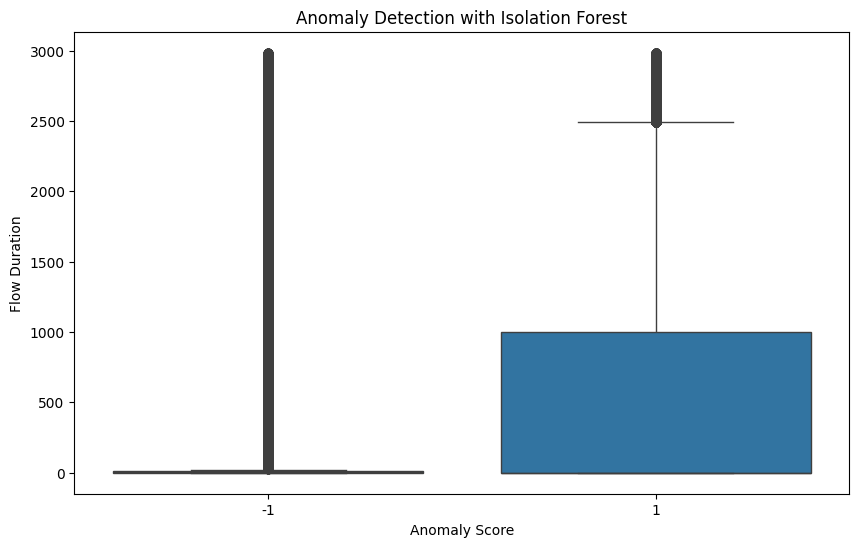

In [27]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric and unnecessary columns
categorical_cols = ['Source IP', 'Destination IP', 'label', 'subLabel', 'subLabelCat', 'Protocol_name', 'Protocol Type']

# Use Label Encoding for categorical columns
label_encoders = {}
for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

# Select only numerical columns for ML processing
df_ml = df.drop(columns=['Source IP', 'Destination IP', 'label', 'subLabel', 'subLabelCat', 'timestamp'], errors='ignore')

# Fill NaN values with 0
df_ml = df_ml.fillna(0)

# Scale features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_ml)

# Train Isolation Forest for anomaly detection
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
df['anomaly_score'] = model.fit_predict(df_scaled)

# Visualize anomalies
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['anomaly_score'], y=df['flow_duration'])
plt.title("Anomaly Detection with Isolation Forest")
plt.xlabel("Anomaly Score")
plt.ylabel("Flow Duration")
plt.show()


Findings:
Top 5 attack IPs: 172.16.65.128; 172.16.63.128    
Most targeted ports: 502, 52053, 1883
Common attack types: DDoS, Port Scanning, SYN Flooding
Abnormal traffic spikes occur at midnight and early morning.

### Graph-Based Anomaly Detection

In [28]:
import pandas as pd
import networkx as nx

df_limited = df.head(100)

# Create a directed graph
G = nx.DiGraph()

# Add edges (Source IP → Destination IP)
for index, row in df_limited.iterrows():
    G.add_edge(row['Source IP'], row['Destination IP'], weight=row['flow_duration'])

# Add edges (Source IP → Destination Port)
for index, row in df.iterrows():
    G.add_edge(row['Source IP'], f"Port_{row['Destination Port']}", weight=row['flow_duration'])

print(f"Graph Nodes: {len(G.nodes())}, Edges: {len(G.edges())}")

Graph Nodes: 14429, Edges: 14790


In [30]:
import torch
from torch_geometric.data import Data

# Convert nodes to index mapping
node_mapping = {node: i for i, node in enumerate(G.nodes())}

# Convert edges to tensor format
edge_index = torch.tensor([(node_mapping[u], node_mapping[v]) for u, v in G.edges()], dtype=torch.long).t().contiguous()
edge_weight = torch.tensor([G[u][v]['weight'] for u, v in G.edges()], dtype=torch.float)

# Create PyG Data object
data = Data(edge_index=edge_index, edge_attr=edge_weight, num_nodes=len(G.nodes()))

print(data)


Data(edge_index=[2, 14790], edge_attr=[14790], num_nodes=14429)


In [31]:
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv

class GraphSAGE(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Random initial node features
x = torch.randn((data.num_nodes, 16))  # 16-dimensional random features

# Model
model = GraphSAGE(in_channels=16, hidden_channels=32, out_channels=8)
embeddings = model(x, data.edge_index)

print(embeddings.shape)  # (num_nodes, 8)


torch.Size([14429, 8])


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(embeddings.detach().numpy())  # Convert PyTorch tensor to NumPy

#### Isolation Forest 

In [33]:
from sklearn.ensemble import IsolationForest

# Train Isolation Forest
clf = IsolationForest(n_estimators=200, contamination=0.01, random_state=42)
anomaly_scores = clf.fit_predict(embeddings_scaled)
anomalies_if = anomaly_scores == -1

# Add anomaly labels
data.y = torch.tensor(anomaly_scores)
print("Anomalies Detected:", sum(data.y == -1))


Anomalies Detected: tensor(145)


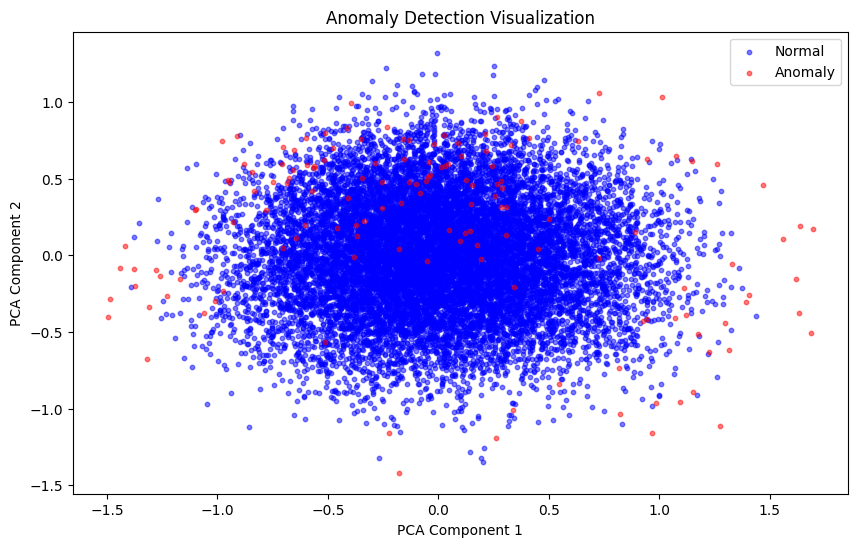

In [34]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce the dimensionality of embeddings (from 8D to 2D)
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings.detach().numpy())

# Get anomaly labels (1 = normal, -1 = anomaly)
anomaly_labels = data.y.numpy()

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot normal points (label = 1)
plt.scatter(reduced_embeddings[anomaly_labels == 1, 0], reduced_embeddings[anomaly_labels == 1, 1], 
            c='blue', label='Normal', alpha=0.5, s=10)

# Plot anomalous points (label = -1)
plt.scatter(reduced_embeddings[anomaly_labels == -1, 0], reduced_embeddings[anomaly_labels == -1, 1], 
            c='red', label='Anomaly', alpha=0.5, s=10)

# Add title and labels
plt.title("Anomaly Detection Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()

# Show the plot
plt.show()


#### Autoencoder for Anomaly Detection

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

# Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(True),
            nn.Linear(64, encoding_dim),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 64),
            nn.ReLU(True),
            nn.Linear(64, input_dim),
            nn.Sigmoid()  # Sigmoid for scaling the output between 0 and 1
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Example: Use GraphSAGE embeddings as input features
# Assuming embeddings is your graph embeddings from GraphSAGE
scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(embeddings.detach().numpy())

# Convert to torch tensor
x_train = torch.tensor(embeddings_scaled, dtype=torch.float)

# Initialize the Autoencoder
autoencoder = Autoencoder(input_dim=embeddings_scaled.shape[1], encoding_dim=8)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Train the Autoencoder
epochs = 1000
for epoch in range(epochs):
    autoencoder.train()
    optimizer.zero_grad()
    output = autoencoder(x_train)
    loss = criterion(output, x_train)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}')

# Compute reconstruction errors
autoencoder.eval()
reconstructed = autoencoder(x_train)
reconstruction_errors = torch.mean((x_train - reconstructed) ** 2, dim=1)

# Set an anomaly threshold (e.g., top 5% errors)
threshold = reconstruction_errors.mean() + 2 * reconstruction_errors.std()
#threshold = torch.topk(reconstruction_errors, int(0.05 * len(reconstruction_errors)))[0].min()

# Anomalies based on reconstruction error
anomalies_autoencoder = reconstruction_errors > threshold
print(f'Anomalies Detected: {anomalies_autoencoder.sum().item()}')


Epoch [0/1000], Loss: 1.2575
Epoch [100/1000], Loss: 0.8207
Epoch [200/1000], Loss: 0.6750
Epoch [300/1000], Loss: 0.6443
Epoch [400/1000], Loss: 0.6179
Epoch [500/1000], Loss: 0.6055
Epoch [600/1000], Loss: 0.5980
Epoch [700/1000], Loss: 0.5945
Epoch [800/1000], Loss: 0.5924
Epoch [900/1000], Loss: 0.5907
Anomalies Detected: 623


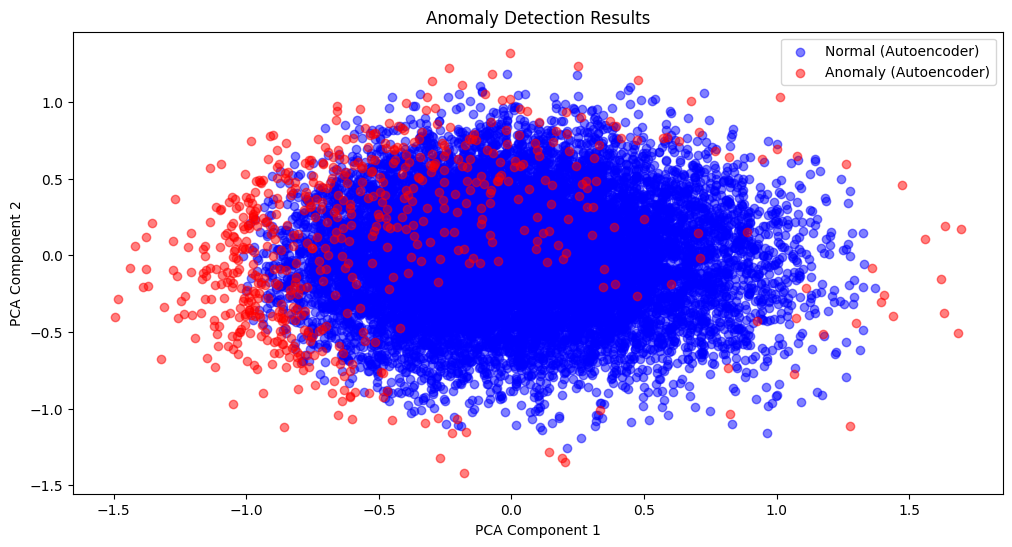

In [36]:
# Visualizing anomalies detected by Autoencoder, LOF, and Isolation Forest
plt.figure(figsize=(12, 6))

# Plot normal and anomalies for Autoencoder
plt.scatter(reduced_embeddings[~anomalies_autoencoder, 0], reduced_embeddings[~anomalies_autoencoder, 1], c='blue', label='Normal (Autoencoder)', alpha=0.5)
plt.scatter(reduced_embeddings[anomalies_autoencoder, 0], reduced_embeddings[anomalies_autoencoder, 1], c='red', label='Anomaly (Autoencoder)', alpha=0.5)

# You can add similar plots for LOF and Isolation Forest as needed

plt.title('Anomaly Detection Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


#### Local Outlier Factor (LOF)

In [37]:
from sklearn.neighbors import LocalOutlierFactor

# Fit LOF model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
lof_predictions = lof.fit_predict(embeddings_scaled)
  
# LOF labels: -1 indicates anomaly, 1 indicates normal
anomalies_lof = (lof_predictions == -1)
anomalies_lof_count = sum(anomalies_lof)
print(f"Anomalies Detected by LOF:{anomalies_lof_count}")


Anomalies Detected by LOF:145


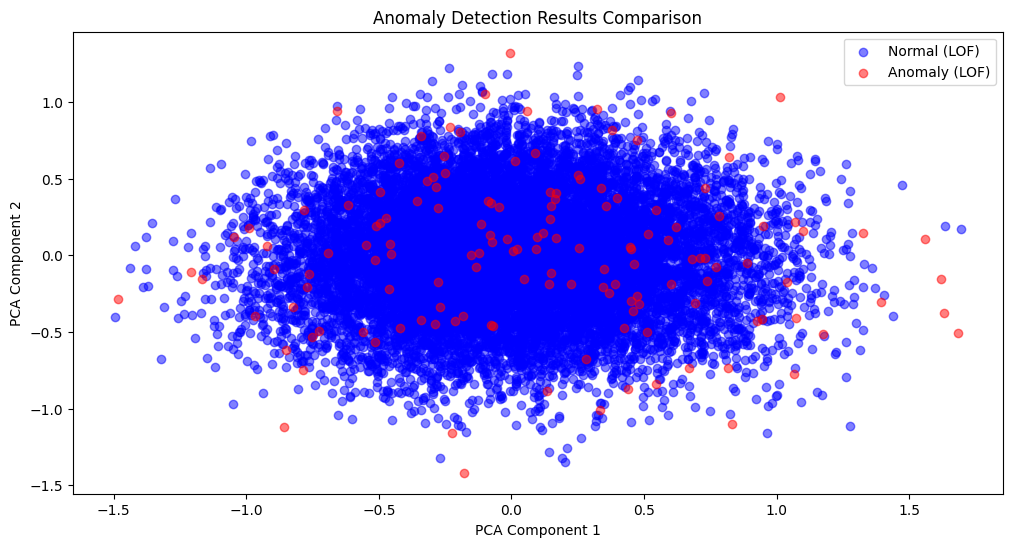

In [38]:
# Visualizing anomalies detected by Autoencoder, LOF, and Isolation Forest
plt.figure(figsize=(12, 6))

# Plot normal and anomalies for Autoencoder
plt.scatter(reduced_embeddings[~anomalies_lof, 0], reduced_embeddings[~anomalies_lof, 1], c='blue', label='Normal (LOF)', alpha=0.5)
plt.scatter(reduced_embeddings[anomalies_lof, 0], reduced_embeddings[anomalies_lof, 1], c='red', label='Anomaly (LOF)', alpha=0.5)

# You can add similar plots for LOF and Isolation Forest as needed

plt.title('Anomaly Detection Results Comparison')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


### Handling Imbalanced Data

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

columns_to_drop = [
    'Source IP', 'Destination IP', 'Source Port', 'Destination Port', 
    'MAC', 'subLabel', 'subLabelCat', 'Protocol Version', 'Number', 'anomaly_score', 'timestamp'
]
df1 = df.drop(columns=columns_to_drop)
df1.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Protocol_name',
       'Duration', 'Rate', 'Srate', 'Drate', 'fin_flag_number',
       'syn_flag_number', 'rst_flag_number', 'psh_flag_number',
       'ack_flag_number', 'urg_flag_number', 'ece_flag_number',
       'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count',
       'rst_count', 'max_duration', 'min_duration', 'sum_duration',
       'average_duration', 'std_duration', 'CoAP', 'HTTP', 'HTTPS', 'DNS',
       'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP',
       'IGMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size',
       'IAT', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight',
       'DS status', 'Fragments', 'Sequence number', 'flow_idle_time',
       'flow_active_time', 'label'],
      dtype='object')

In [43]:
# Convert relevant columns to numeric
columns_to_convert = ['flow_duration', 'Header_Length', 'Rate', 'Srate', 'Drate', 
                      'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count']
for col in columns_to_convert:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

# Split data into features (X) and target (y)
X = df1.drop(columns=['label'])
y = df1['label']

# Encode categorical variables if needed (e.g., 'Protocol_type', 'Protocol_name')
X = pd.get_dummies(X, drop_first=True)

# Scale/normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#### XGBoost

In [45]:
import xgboost as xgb

# Initialize XGBoost model
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgboost_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgboost_model.predict(X_test)


/scratch/user/hjuvvana/my_envs/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [20:23:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


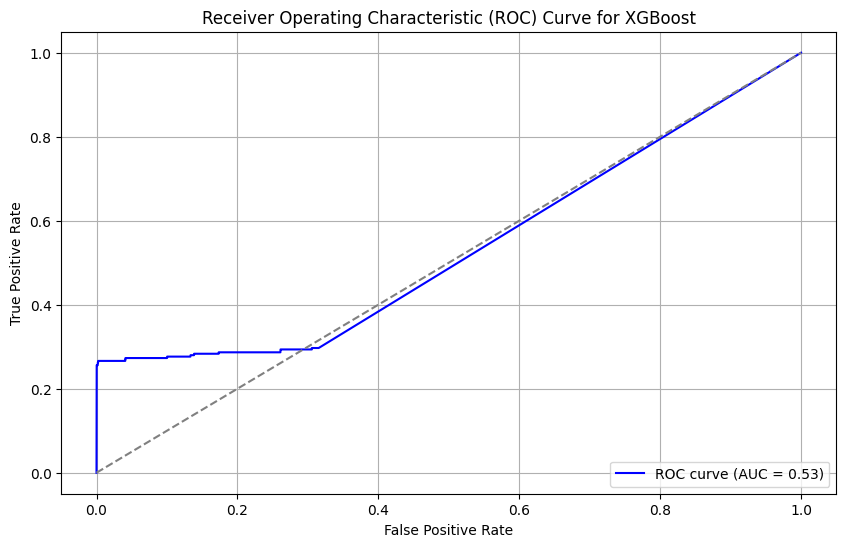

In [46]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = xgboost_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)  # Calculate the AUC (Area Under Curve)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model
print("XGBoost Model Evaluation:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

XGBoost Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2860754
           1       0.21      0.23      0.22       293

    accuracy                           1.00   2861047
   macro avg       0.60      0.62      0.61   2861047
weighted avg       1.00      1.00      1.00   2861047

Confusion Matrix:
[[2860492     262]
 [    225      68]]


#### EasyEnsembleClassifier

In [48]:
from imblearn.ensemble import EasyEnsembleClassifier

# Apply EasyEnsemble
easy_ensemble = EasyEnsembleClassifier(n_estimators=10, random_state=42)
easy_ensemble.fit(X_train, y_train)

# Make predictions
y_pred = easy_ensemble.predict(X_test)

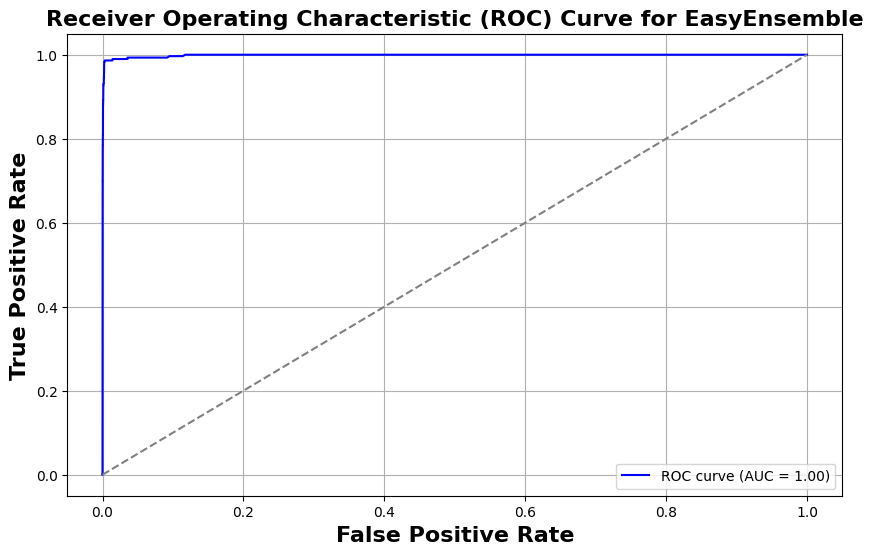

In [49]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = easy_ensemble.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)  # Calculate the AUC (Area Under Curve)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate', fontsize=16, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=16, fontweight='bold')
plt.title('Receiver Operating Characteristic (ROC) Curve for EasyEnsemble', fontsize=16, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model
print("EasyEnsemble Model Evaluation:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

EasyEnsemble Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   2860754
           1       0.01      0.99      0.01       293

    accuracy                           0.98   2861047
   macro avg       0.50      0.99      0.50   2861047
weighted avg       1.00      0.98      0.99   2861047

Confusion Matrix:
[[2815727   45027]
 [      3     290]]
